#2η ομαδική εργασία στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

Παράδοση: 26/5/2022<br>
Ομάδα 9: Δημήτριος Καλέμης - el18152

## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfiltered_list if it exists in in target_list
def get_ds_index(unfiltered_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiltered_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [3]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169017344/169001437 [==============================] - 2s 0us/step


In [4]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας. 

In [5]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 9

In [6]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [7]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

[28]


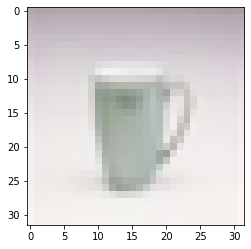

In [8]:
#print(our_index)
plt.imshow(x_train_ds[0])
print(y_train_ds[0])

In [9]:
# print our classes
print(our_classes)
print(our_index)
print((y_train_ds))

[' beaver', ' bed', ' camel', ' can', ' caterpillar', ' crab', ' cup', ' forest', ' kangaroo', ' leopard', ' mushroom', ' orchid', ' sea', ' skyscraper', ' streetcar', ' table', ' tiger', ' trout', ' tulip', ' wardrobe']
[4, 5, 15, 16, 18, 26, 28, 33, 38, 42, 51, 54, 71, 76, 81, 84, 88, 91, 92, 94]
[[28]
 [71]
 [71]
 ...
 [26]
 [16]
 [33]]


In [10]:
print(x_train_ds.shape)

(10000, 32, 32, 3)


In [11]:
# fix mapping [0, numclasses-1] -> [0, 19]
d = {}
for i in range(20):
  d[our_index[i]] = i # new key, so add
print(d)

{4: 0, 5: 1, 15: 2, 16: 3, 18: 4, 26: 5, 28: 6, 33: 7, 38: 8, 42: 9, 51: 10, 54: 11, 71: 12, 76: 13, 81: 14, 84: 15, 88: 16, 91: 17, 92: 18, 94: 19}


In [12]:
# apply mapping to y_train_ds and make the z_train_ds matrix

z_train_ds = y_train_ds.copy()
z_test_ds = y_test_ds.copy()

for k in range(len(y_train_ds)):
  z_train_ds[k][0] = d[y_train_ds[k][0]]

for k in range(len(y_test_ds)):
  z_test_ds[k][0] = d[y_test_ds[k][0]]


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


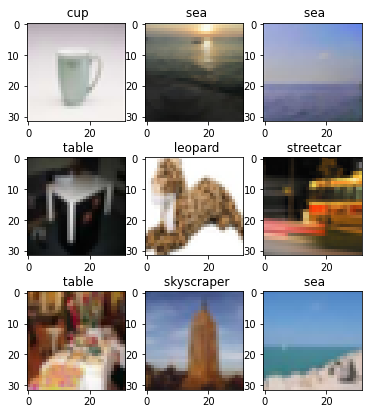

In [13]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = z_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = z_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = z_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 7))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train_ds[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

## Ερώτημα 1
---
#### Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων

 1. Σχεδίαστε, μεταγλωττίστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας διαφορετικούς συνδυασμούς (τουλάχιστον 2 ανά μοντέλο) για [optimizer](https://keras.io/api/optimizers/), [loss](https://keras.io/api/losses/), batch size και epoch.  Για [metrics](https://keras.io/api/metrics/) να χρησιμοποιήσετε την ορθότητα (όπως στο Lab8.1).
---
  
#### Βήμα 2: Αξιολόγηση των μοντέλων

1. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε, απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών, για κάθε διαφορετικό συνδυασμό του βήματος 1 και επιλέξτε αυτό με την καλύτερη ορθότητα από κάθε μοντέλο (ένα από κάθε αρχιτεκτονική, συνολικά 4).
2. Για κάθε ένα από τα μοντέλα με την καλύτερη ορθότητα (συνολικά **4**), απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών.
3. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
 
---

#### Βήμα 3: Αξιολόγηση ορθότητας
Αξιολογήστε την ορθότητα για το test set σας.


##Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων


###Σχεδίαση Μοντέλων

In [14]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 82 kB 637 kB/s 
     |████████████████████████████████| 9.9 MB 16.5 MB/s 
     |████████████████████████████████| 11.2 MB 65.6 MB/s 
     |████████████████████████████████| 15.7 MB 55.9 MB/s 
     |████████████████████████████████| 61 kB 2.5 MB/s 
     |████████████████████████████████| 930 kB 58.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    

In [15]:
import tensorflow as tf
from d2l import tensorflow as d2l

####LeNet

Αλλάζουμε το τελευταίο layers.Dense σε 20, επειδή έχουμε 20 κατηγορίες αντικειμένων.

In [ ]:
# Code from Dive into Deep Learning - 6.6. Convolutional Neural Networks
# Our LeNet model: images 32x32x3 and 20 categories 

def LeNet():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid',
                               padding='same'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=16, kernel_size=5,
                               activation='sigmoid'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='sigmoid'),
        tf.keras.layers.Dense(84, activation='sigmoid'),
        tf.keras.layers.Dense(20)])


# === Original LeNet model ===
#def LeNet_original():
#    return tf.keras.models.Sequential([
#        tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid',
#                               padding='same'),
#        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
#        tf.keras.layers.Conv2D(filters=16, kernel_size=5,
#                               activation='sigmoid'),
#        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
#        tf.keras.layers.Flatten(),
#        tf.keras.layers.Dense(120, activation='sigmoid'),
#        tf.keras.layers.Dense(84, activation='sigmoid'),
#        tf.keras.layers.Dense(10)])

In [ ]:
# Build the model and get the summary for LeNet

X = tf.random.uniform((1, 32, 32, 3))
for layer in LeNet().layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

LeNet_model_1 = LeNet()
LeNet_model_1.build((1, 32, 32, 3))           # each image is size 32x32 and has 3 channels (rgb)

LeNet_model_2 = LeNet()
LeNet_model_2.build((1, 32, 32, 3)) 

LeNet_model_1.summary()

Conv2D output shape: 	 (1, 32, 32, 6)
AveragePooling2D output shape: 	 (1, 16, 16, 6)
Conv2D output shape: 	 (1, 12, 12, 16)
AveragePooling2D output shape: 	 (1, 6, 6, 16)
Flatten output shape: 	 (1, 576)
Dense output shape: 	 (1, 120)
Dense output shape: 	 (1, 84)
Dense output shape: 	 (1, 20)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (1, 32, 32, 6)            456       
                                                                 
 average_pooling2d_2 (Averag  (1, 16, 16, 6)           0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (1, 12, 12, 16)           2416      
                                                                 
 average_pooling2d_3 (Averag  (1, 6, 6, 16)            0         
 ePooling2D)          

####AlexNet

Αλλάζουμε το τελευταίο layers.Dense σε 20, επειδή έχουμε 20 κατηγορίες αντικειμένων. Επιπλέον, από τη στιγμή που οι εικόνες μας έχουν διαστάσεις 32x32x3, γίνονται οι κατάλληλες προσαρμογές στη πρώτη συνέλιξη έτσι ώστε να μη μικρύνουν υπερβολικά οι εικόνες μας. Πιο συγκεκριμένα, βάζουμε kernel_size=3 χωρίς padding  και strides=2, οπότε μειώνεται η διάσταση της εικόνας αλλά όχι σε υπερβολικό βαθμό. Στην αρχική υλοποίηση του AlexNet, επειδή οι εικόνες εισόδου έχουν πολύ μεγαλύτερο μέγεθος, η συνέλιξη έχει αρκετά διαφορετικές παραμέτρους.

In [ ]:
# Code from Dive into Deep Learning - 7.1. Deep Convolutional Neural Networks (AlexNet)
# Our AlexNet model: images 32x32x3 and 20 categories

def AlexNet():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=96, kernel_size=3, strides=2,
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(20)
    ])


# === Original AlexNet model ===
#def AlexNet_original():
#    return tf.keras.models.Sequential([
#        tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4,
#                               activation='relu'),
#        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
#        tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same',
#                               activation='relu'),
#        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
#        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',
#                               activation='relu'),
#        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',
#                               activation='relu'),
#        tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
#                               activation='relu'),
#        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
#        tf.keras.layers.Flatten(),
#        tf.keras.layers.Dense(4096, activation='relu'),
#        tf.keras.layers.Dropout(0.5),
#        tf.keras.layers.Dense(4096, activation='relu'),
#        tf.keras.layers.Dropout(0.5),
#        tf.keras.layers.Dense(1000)
#    ])

In [ ]:
# Build the model and get the summary for AlexNet

X = tf.random.uniform((1, 32, 32, 3))
for layer in AlexNet().layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

AlexNet_model_1 = AlexNet()
AlexNet_model_1.build((1, 32, 32, 3))           # each image is size 32x32 and has 3 channels (rgb)

AlexNet_model_2 = AlexNet()
AlexNet_model_2.build((1, 32, 32, 3)) 

AlexNet_model_1.summary()

Conv2D output shape:	 (1, 15, 15, 96)
MaxPooling2D output shape:	 (1, 7, 7, 96)
Conv2D output shape:	 (1, 7, 7, 256)
MaxPooling2D output shape:	 (1, 3, 3, 256)
Conv2D output shape:	 (1, 3, 3, 384)
Conv2D output shape:	 (1, 3, 3, 384)
Conv2D output shape:	 (1, 3, 3, 256)
MaxPooling2D output shape:	 (1, 1, 1, 256)
Flatten output shape:	 (1, 256)
Dense output shape:	 (1, 4096)
Dropout output shape:	 (1, 4096)
Dense output shape:	 (1, 4096)
Dropout output shape:	 (1, 4096)
Dense output shape:	 (1, 20)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (1, 15, 15, 96)           2688      
                                                                 
 max_pooling2d_3 (MaxPooling  (1, 7, 7, 96)            0         
 2D)                                                             
                                                                 
 conv2d_12 (C

####VGG

Αλλάζουμε το τελευταίο layers.Dense σε 20, επειδή έχουμε 20 κατηγορίες αντικειμένων. Επιπλέον, γίνεται χρήση λιγότερων vgg blocks από όσα έχει η υλοποίηση του άρθρου (δηλαδή λιγότερα layers), έτσι ώστε να μην μειώνονται υπερβολικά οι διαστάσεις της εξόδου. Πιο συγκεκριμένα, η custom υλοποίησή μας έχει 3 vgg blocks σε αντίθεση με την original υλοποίηση η οποία έχει 5. 

In [ ]:
def vgg_block(num_convs, num_channels):
    blk = tf.keras.models.Sequential()
    for _ in range(num_convs):
        blk.add(tf.keras.layers.Conv2D(num_channels,kernel_size=3,
                                    padding='same',activation='relu'))
    blk.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    return blk

In [ ]:
# Code from Dive into Deep Learning - 7.2. Networks Using Blocks (VGG)
# Our VGG model: images 32x32x3 and 20 categories

def vgg(conv_arch):
    net = tf.keras.models.Sequential()
    # The convulational part
    for (num_convs, num_channels) in conv_arch:
        net.add(vgg_block(num_convs, num_channels))
    # The fully-connected part
    net.add(tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(20)]))
    return net


# === Original VGG model ===
#def vgg_original(conv_arch):
#    net = tf.keras.models.Sequential()
#    for (num_convs, num_channels) in conv_arch:
#        net.add(vgg_block(num_convs, num_channels))
#    net.add(tf.keras.models.Sequential([
#        tf.keras.layers.Flatten(),
#        tf.keras.layers.Dense(4096, activation='relu'),
#        tf.keras.layers.Dropout(0.5),
#        tf.keras.layers.Dense(4096, activation='relu'),
#        tf.keras.layers.Dropout(0.5),
#        tf.keras.layers.Dense(10)]))
#    return net

#conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))


In [ ]:
# Build the model and get the summary for VGG

conv_arch = ((1, 64), (1, 128), (2, 256))
X = tf.random.uniform((1, 32, 32, 3))
for blk in vgg(conv_arch).layers:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t', X.shape)

vgg_model_1 = vgg(conv_arch)
vgg_model_1.build((1, 32, 32, 3))

vgg_model_2 = vgg(conv_arch)
vgg_model_2.build((1, 32, 32, 3))

vgg_model_1.summary()

Sequential output shape:	 (1, 16, 16, 64)
Sequential output shape:	 (1, 8, 8, 128)
Sequential output shape:	 (1, 4, 4, 256)
Sequential output shape:	 (1, 20)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (1, 16, 16, 64)           1792      
                                                                 
 sequential_13 (Sequential)  (1, 8, 8, 128)            73856     
                                                                 
 sequential_14 (Sequential)  (1, 4, 4, 256)            885248    
                                                                 
 sequential_15 (Sequential)  (1, 20)                   33644564  
                                                                 
Total params: 34,605,460
Trainable params: 34,605,460
Non-trainable params: 0
_________________________________________________________________


####MyCNN

Για το μοντέλο MyCNN επιλέγουμε να κάνουμε 5 συνελίξες εκ των οποίων η πρώτη γίνεται χωρίς padding και οι υπόλοιπες γίνονται με padding. Επιλέγουμε σχετικά υψηλή τιμή filters στις συνελίξεις, με αποτέλεσμα να παίρνει περισσότερο χρόνο η εκπαίδευση του νευρωνικού, καθώς πραγματοποιούνται περισσότερες πράξεις. Επιπλέον, έχουμε τρεις MaxPool2d, οι οποίες κάνουν downsampling ενδιάμεσα από τις συνελίξεις. Τέλος, όπως και στα παραπάνω νευρωνικά δίκτυα επιλέγουμε 3 dense layers. Το τελευταίο dense layer εχει output 20, όσες δηλαδή και οι κατηγορίες μας.

In [ ]:
def MyCNN():
        return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(20)
    ])

In [ ]:
X = tf.random.uniform((1, 32, 32, 3))
for layer in MyCNN().layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

MyCNN_model_1 = MyCNN()
MyCNN_model_1.build((1, 32, 32, 3))           # each image is size 32x32 and has 3 channels (rgb) 

MyCNN_model_2 = MyCNN()
MyCNN_model_2.build((1, 32, 32, 3))

MyCNN_model_1.summary()

Conv2D output shape:	 (1, 30, 30, 128)
Conv2D output shape:	 (1, 30, 30, 256)
MaxPooling2D output shape:	 (1, 14, 14, 256)
Conv2D output shape:	 (1, 14, 14, 512)
MaxPooling2D output shape:	 (1, 6, 6, 512)
Conv2D output shape:	 (1, 6, 6, 512)
Conv2D output shape:	 (1, 6, 6, 256)
MaxPooling2D output shape:	 (1, 2, 2, 256)
Flatten output shape:	 (1, 1024)
Dense output shape:	 (1, 4096)
Dropout output shape:	 (1, 4096)
Dense output shape:	 (1, 4096)
Dropout output shape:	 (1, 4096)
Dense output shape:	 (1, 20)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (1, 30, 30, 128)          3584      
                                                                 
 conv2d_21 (Conv2D)          (1, 30, 30, 256)          819456    
                                                                 
 max_pooling2d_12 (MaxPoolin  (1, 14, 14, 256)         0         
 g2D

###Μεταγλώττιση και εκπαίδευση μοντέλων

####LeNet

* Πρώτη υλοποίηση LeNet: optimizer='adam', epochs=50, batch_size=256

In [ ]:
LeNet_model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

LeNet_history_1 = LeNet_model_1.fit(x_train, y_train, epochs=50, batch_size=256,
                    validation_data=(x_test, y_test))

LeNet_model_1.save('LeNet_model_1.h5')

Epoch 1/50
34/34 [==============================] - 6s 42ms/step - loss: 3.0320 - accuracy: 0.0459 - val_loss: 3.0005 - val_accuracy: 0.0500
Epoch 2/50
34/34 [==============================] - 1s 22ms/step - loss: 3.0000 - accuracy: 0.0502 - val_loss: 2.9999 - val_accuracy: 0.0500
Epoch 3/50
34/34 [==============================] - 1s 22ms/step - loss: 3.0013 - accuracy: 0.0475 - val_loss: 2.9982 - val_accuracy: 0.0500
Epoch 4/50
34/34 [==============================] - 1s 16ms/step - loss: 2.9987 - accuracy: 0.0514 - val_loss: 2.9967 - val_accuracy: 0.0500
Epoch 5/50
34/34 [==============================] - 0s 14ms/step - loss: 2.9895 - accuracy: 0.0648 - val_loss: 2.9676 - val_accuracy: 0.0605
Epoch 6/50
34/34 [==============================] - 0s 13ms/step - loss: 2.9238 - accuracy: 0.0984 - val_loss: 2.8703 - val_accuracy: 0.1060
Epoch 7/50
34/34 [==============================] - 0s 13ms/step - loss: 2.8396 - accuracy: 0.1134 - val_loss: 2.8045 - val_accuracy: 0.1180
Epoch 8/50
34

* Δεύτερη υλοποίηση LeNet: optimizer='Nadam', epochs=50, batch_size=10

In [ ]:
LeNet_model_2.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

LeNet_history_2 = LeNet_model_2.fit(x_train, y_train, epochs=50, batch_size=10,
                    validation_data=(x_test, y_test))

LeNet_model_2.save('LeNet_model_2.h5')

Epoch 1/50
850/850 [==============================] - 7s 7ms/step - loss: 2.9241 - accuracy: 0.0865 - val_loss: 2.7676 - val_accuracy: 0.1235
Epoch 2/50
850/850 [==============================] - 5s 6ms/step - loss: 2.7257 - accuracy: 0.1445 - val_loss: 2.6944 - val_accuracy: 0.1650
Epoch 3/50
850/850 [==============================] - 6s 6ms/step - loss: 2.6396 - accuracy: 0.1798 - val_loss: 2.6055 - val_accuracy: 0.1940
Epoch 4/50
850/850 [==============================] - 7s 8ms/step - loss: 2.5355 - accuracy: 0.2116 - val_loss: 2.4792 - val_accuracy: 0.2565
Epoch 5/50
850/850 [==============================] - 6s 7ms/step - loss: 2.4275 - accuracy: 0.2491 - val_loss: 2.3802 - val_accuracy: 0.2910
Epoch 6/50
850/850 [==============================] - 5s 6ms/step - loss: 2.3452 - accuracy: 0.2742 - val_loss: 2.3450 - val_accuracy: 0.2790
Epoch 7/50
850/850 [==============================] - 5s 6ms/step - loss: 2.2818 - accuracy: 0.2899 - val_loss: 2.2858 - val_accuracy: 0.2995
Epoch 

####AlexNet

* Πρώτη υλοποίηση AlexNet: optimizer='adam', epochs=30, batch_size=128

In [ ]:
AlexNet_model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

AlexNet_history_1 = AlexNet_model_1.fit(x_train, y_train, epochs=30, batch_size=128,
                    validation_data=(x_test, y_test))

AlexNet_model_1.save('AlexNet_model_1.h5')

Epoch 1/30
67/67 [==============================] - 6s 69ms/step - loss: 2.9969 - accuracy: 0.0532 - val_loss: 2.9912 - val_accuracy: 0.0510
Epoch 2/30
67/67 [==============================] - 4s 54ms/step - loss: 2.8871 - accuracy: 0.0944 - val_loss: 2.7611 - val_accuracy: 0.1210
Epoch 3/30
67/67 [==============================] - 4s 54ms/step - loss: 2.7271 - accuracy: 0.1258 - val_loss: 2.6365 - val_accuracy: 0.1575
Epoch 4/30
67/67 [==============================] - 4s 54ms/step - loss: 2.6353 - accuracy: 0.1500 - val_loss: 2.6462 - val_accuracy: 0.1495
Epoch 5/30
67/67 [==============================] - 4s 55ms/step - loss: 2.6014 - accuracy: 0.1520 - val_loss: 2.5495 - val_accuracy: 0.1880
Epoch 6/30
67/67 [==============================] - 4s 57ms/step - loss: 2.5392 - accuracy: 0.1865 - val_loss: 2.4844 - val_accuracy: 0.2130
Epoch 7/30
67/67 [==============================] - 4s 55ms/step - loss: 2.4300 - accuracy: 0.2271 - val_loss: 2.3865 - val_accuracy: 0.2350
Epoch 8/30
67

* Δεύτερη υλοποίηση AlexNet: optimizer='RMSprop', epochs=25, batch_size=64

In [ ]:
AlexNet_model_2.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

AlexNet_history_2 = AlexNet_model_2.fit(x_train, y_train, epochs=30, batch_size=64,
                    validation_data=(x_test, y_test))

AlexNet_model_2.save('AlexNet_model_2.h5')

Epoch 1/30
133/133 [==============================] - 8s 48ms/step - loss: 3.5264 - accuracy: 0.0681 - val_loss: 2.8205 - val_accuracy: 0.1075
Epoch 2/30
133/133 [==============================] - 6s 45ms/step - loss: 2.8479 - accuracy: 0.1098 - val_loss: 2.7277 - val_accuracy: 0.1125
Epoch 3/30
133/133 [==============================] - 6s 45ms/step - loss: 2.7420 - accuracy: 0.1293 - val_loss: 2.6296 - val_accuracy: 0.1575
Epoch 4/30
133/133 [==============================] - 6s 45ms/step - loss: 2.6549 - accuracy: 0.1527 - val_loss: 2.5549 - val_accuracy: 0.1805
Epoch 5/30
133/133 [==============================] - 6s 45ms/step - loss: 2.5449 - accuracy: 0.2088 - val_loss: 2.3231 - val_accuracy: 0.2880
Epoch 6/30
133/133 [==============================] - 6s 46ms/step - loss: 2.3365 - accuracy: 0.2827 - val_loss: 2.1661 - val_accuracy: 0.3405
Epoch 7/30
133/133 [==============================] - 6s 45ms/step - loss: 2.1715 - accuracy: 0.3324 - val_loss: 2.3741 - val_accuracy: 0.2935

####VGG

* Πρώτη υλοποίηση VGG: optimizer='adam', epochs=15, batch_size=128

In [ ]:
vgg_model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

vgg_history_1 = vgg_model_1.fit(x_train, y_train, epochs=20, batch_size=128,
                    validation_data=(x_test, y_test))

vgg_model_1.save('vgg_model_1.h5')

Epoch 1/20
67/67 [==============================] - 6s 68ms/step - loss: 2.8437 - accuracy: 0.1098 - val_loss: 2.5987 - val_accuracy: 0.1835
Epoch 2/20
67/67 [==============================] - 4s 59ms/step - loss: 2.4627 - accuracy: 0.2201 - val_loss: 2.2672 - val_accuracy: 0.3085
Epoch 3/20
67/67 [==============================] - 4s 59ms/step - loss: 2.2111 - accuracy: 0.3094 - val_loss: 2.0009 - val_accuracy: 0.3990
Epoch 4/20
67/67 [==============================] - 4s 60ms/step - loss: 1.9184 - accuracy: 0.4128 - val_loss: 1.8055 - val_accuracy: 0.4500
Epoch 5/20
67/67 [==============================] - 4s 59ms/step - loss: 1.7200 - accuracy: 0.4684 - val_loss: 1.6814 - val_accuracy: 0.4770
Epoch 6/20
67/67 [==============================] - 4s 60ms/step - loss: 1.5115 - accuracy: 0.5380 - val_loss: 1.5422 - val_accuracy: 0.5380
Epoch 7/20
67/67 [==============================] - 4s 60ms/step - loss: 1.3032 - accuracy: 0.5958 - val_loss: 1.5168 - val_accuracy: 0.5395
Epoch 8/20
67

* Δεύτερη υλοποίηση VGG: optimizer='Nadam', epochs=15, batch_size=256

In [ ]:
vgg_model_2.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

vgg_history_2 = vgg_model_2.fit(x_train, y_train, epochs=20, batch_size=256,
                    validation_data=(x_test, y_test))

vgg_model_2.save('vgg_model_2.h5')

Epoch 1/20
34/34 [==============================] - 7s 144ms/step - loss: 3.0324 - accuracy: 0.0595 - val_loss: 2.9922 - val_accuracy: 0.0510
Epoch 2/20
34/34 [==============================] - 4s 124ms/step - loss: 2.9956 - accuracy: 0.0578 - val_loss: 3.7909 - val_accuracy: 0.0500
Epoch 3/20
34/34 [==============================] - 4s 125ms/step - loss: 3.0253 - accuracy: 0.0689 - val_loss: 2.9815 - val_accuracy: 0.0660
Epoch 4/20
34/34 [==============================] - 4s 124ms/step - loss: 3.1176 - accuracy: 0.0554 - val_loss: 2.9916 - val_accuracy: 0.0730
Epoch 5/20
34/34 [==============================] - 4s 125ms/step - loss: 2.9778 - accuracy: 0.0671 - val_loss: 2.9480 - val_accuracy: 0.0845
Epoch 6/20
34/34 [==============================] - 4s 124ms/step - loss: 2.9516 - accuracy: 0.0824 - val_loss: 2.8778 - val_accuracy: 0.1095
Epoch 7/20
34/34 [==============================] - 4s 124ms/step - loss: 2.9822 - accuracy: 0.1005 - val_loss: 2.8934 - val_accuracy: 0.1100
Epoch 

####MyCNN

* Πρώτη υλοποίηση MyCNN: optimizer='adam', epochs=25, batch_size=128

In [ ]:
MyCNN_model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MyCNN_history_1 = MyCNN_model_1.fit(x_train, y_train, epochs=30, batch_size=128,
                    validation_data=(x_test, y_test))

MyCNN_model_1.save('MyCNN_model_1.h5')

Epoch 1/30
67/67 [==============================] - 21s 249ms/step - loss: 2.9977 - accuracy: 0.0480 - val_loss: 2.9961 - val_accuracy: 0.0500
Epoch 2/30
67/67 [==============================] - 14s 214ms/step - loss: 2.9941 - accuracy: 0.0529 - val_loss: 2.9932 - val_accuracy: 0.0730
Epoch 3/30
67/67 [==============================] - 14s 214ms/step - loss: 2.7906 - accuracy: 0.1249 - val_loss: 2.6561 - val_accuracy: 0.1510
Epoch 4/30
67/67 [==============================] - 14s 213ms/step - loss: 2.5589 - accuracy: 0.1838 - val_loss: 2.5082 - val_accuracy: 0.2160
Epoch 5/30
67/67 [==============================] - 14s 216ms/step - loss: 2.4381 - accuracy: 0.2227 - val_loss: 2.3766 - val_accuracy: 0.2540
Epoch 6/30
67/67 [==============================] - 14s 213ms/step - loss: 2.3373 - accuracy: 0.2586 - val_loss: 2.2146 - val_accuracy: 0.3050
Epoch 7/30
67/67 [==============================] - 15s 217ms/step - loss: 2.2095 - accuracy: 0.3012 - val_loss: 2.1814 - val_accuracy: 0.3110

* Δεύτερη υλοποίηση MyCNN: optimizer='RMSprop', epochs=25, batch_size=64

In [ ]:
MyCNN_model_2.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MyCNN_history_2 = MyCNN_model_2.fit(x_train, y_train, epochs=30, batch_size=64,
                    validation_data=(x_test, y_test))

MyCNN_model_2.save('MyCNN_model_2.h5')

Epoch 1/30
133/133 [==============================] - 21s 137ms/step - loss: 5.7921 - accuracy: 0.0531 - val_loss: 2.9955 - val_accuracy: 0.0500
Epoch 2/30
133/133 [==============================] - 18s 132ms/step - loss: 3.0822 - accuracy: 0.0704 - val_loss: 2.8975 - val_accuracy: 0.0790
Epoch 3/30
133/133 [==============================] - 18s 133ms/step - loss: 2.9160 - accuracy: 0.0951 - val_loss: 2.7731 - val_accuracy: 0.1130
Epoch 4/30
133/133 [==============================] - 18s 135ms/step - loss: 2.7505 - accuracy: 0.1495 - val_loss: 2.5135 - val_accuracy: 0.2435
Epoch 5/30
133/133 [==============================] - 18s 133ms/step - loss: 2.5616 - accuracy: 0.2172 - val_loss: 2.3117 - val_accuracy: 0.2980
Epoch 6/30
133/133 [==============================] - 18s 133ms/step - loss: 2.3527 - accuracy: 0.2839 - val_loss: 2.1444 - val_accuracy: 0.3405
Epoch 7/30
133/133 [==============================] - 18s 133ms/step - loss: 2.1311 - accuracy: 0.3574 - val_loss: 3.4026 - val_ac

##Βήμα 2: Αξιολόγηση των μοντέλων


In [ ]:
# Define plot function
def plot_accuracy_1(model_history):
  epochs = range(1, len(model_history.history['accuracy']) + 1)             # get number of epochs
  accuracy = model_history.history['accuracy']
  val_accuracy = model_history.history['val_accuracy']
  plt.figure(figsize=(10, 7))
  plt.plot(epochs, accuracy, label='accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.ylim(0, 1)
  plt.legend()

In [139]:
# Define plot function
def plot_accuracy(model_history_1, model_history_2, titles):

  epochs_1 = range(1, len(model_history_1.history['accuracy']) + 1)             # get number of epochs
  accuracy_1 = model_history_1.history['accuracy']
  val_accuracy_1 = model_history_1.history['val_accuracy']

  epochs_2 = range(1, len(model_history_2.history['accuracy']) + 1)
  accuracy_2 = model_history_2.history['accuracy']
  val_accuracy_2 = model_history_2.history['val_accuracy']


  fig, ax = plt.subplots(1, 2, figsize=(20, 7))

  ax[0].plot(epochs_1, accuracy_1, label='accuracy')
  ax[0].plot(epochs_1, val_accuracy_1, label='val_accuracy')
  ax[0].set_title(model_history_1)
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Accuracy')
  ax[0].set_ylim(0, 1)
  ax[0].legend()
  ax[0].set_title(titles[0])

  ax[1].plot(epochs_2, accuracy_2, label='accuracy')
  ax[1].plot(epochs_2, val_accuracy_2, label='val_accuracy')
  ax[1].set_title(model_history_2)
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Accuracy')
  ax[1].set_ylim(0, 1)
  ax[1].legend()
  ax[1].set_title(titles[1])

####LeNet

LeNet_model_1 optimizer: adam <br>
LeNet_model_2 optimizer: Nadam

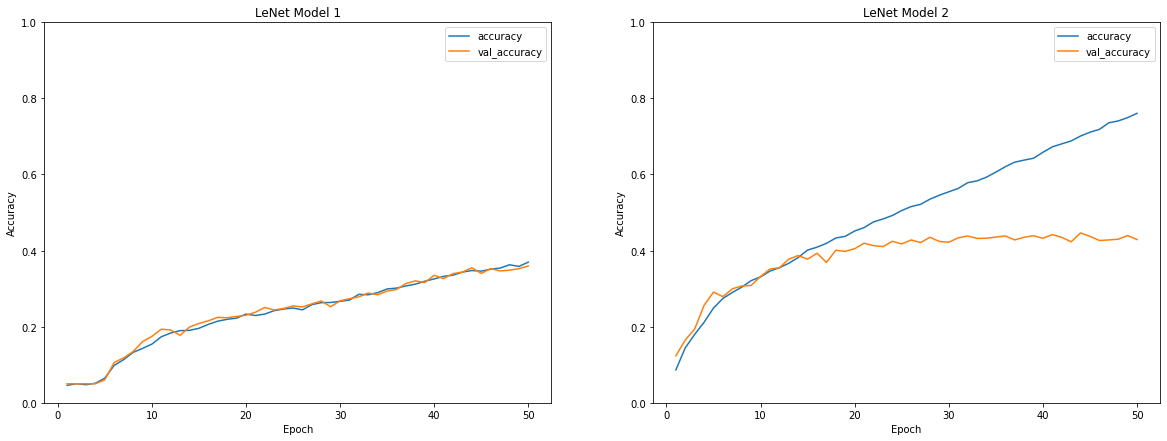

In [ ]:
plot_accuracy(LeNet_history_1, LeNet_history_2, ['LeNet Model 1', 'LeNet Model 2'])

Επιλέγουμε το δεύτερο μοντέλο LeNet, καθώς έχει τόσο καλύτερο accuracy όσο και καλύτερο val_accuracy.

####AlexNet

AlexNet_model_1 optimizer: adam <br>
AlexNet_model_2 optimizer: RMSprop

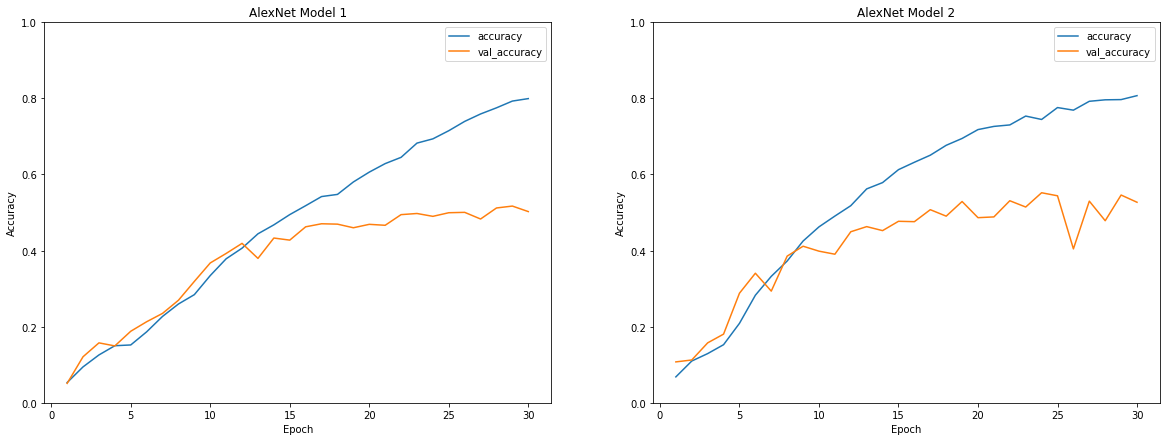

In [ ]:
plot_accuracy(AlexNet_history_1, AlexNet_history_2, ['AlexNet Model 1', 'AlexNet Model 2'])

Επιλέγουμε το δεύτερο μοντέλο AlexNet, καθώς έχει τόσο καλύτερο accuracy όσο και καλύτερο val_accuracy.

####VGG

vgg_model_1 optimizer: adam <br>
vgg_model_2 optimizer: Nadam

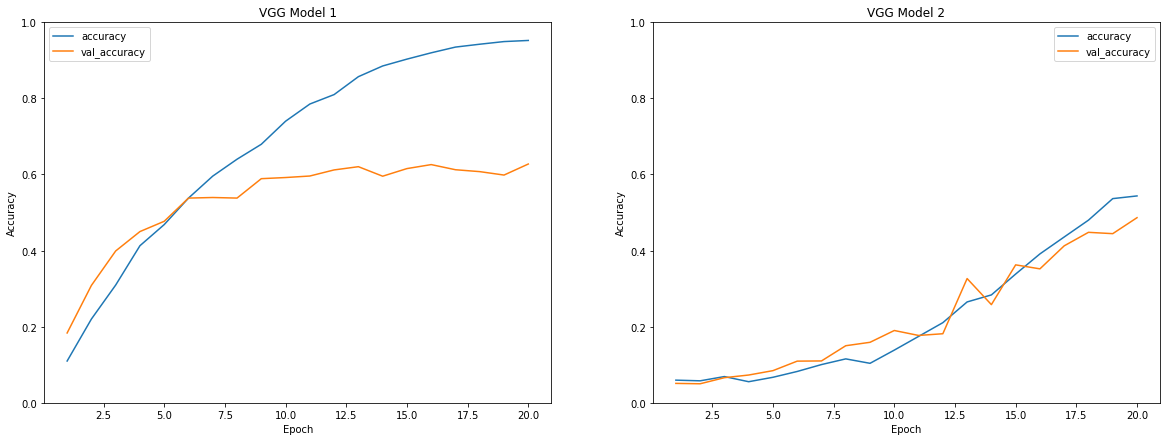

In [ ]:
plot_accuracy(vgg_history_1, vgg_history_2, ['VGG Model 1', 'VGG Model 2'])

Επιλέγουμε το πρώτο μοντέλο VGG, καθώς έχει τόσο καλύτερο accuracy όσο και καλύτερο val_accuracy.

####MyCNN

MyCNN_model_1 optimizer: adam <br>
MyCNN_model_2 optimizer: RMSprop

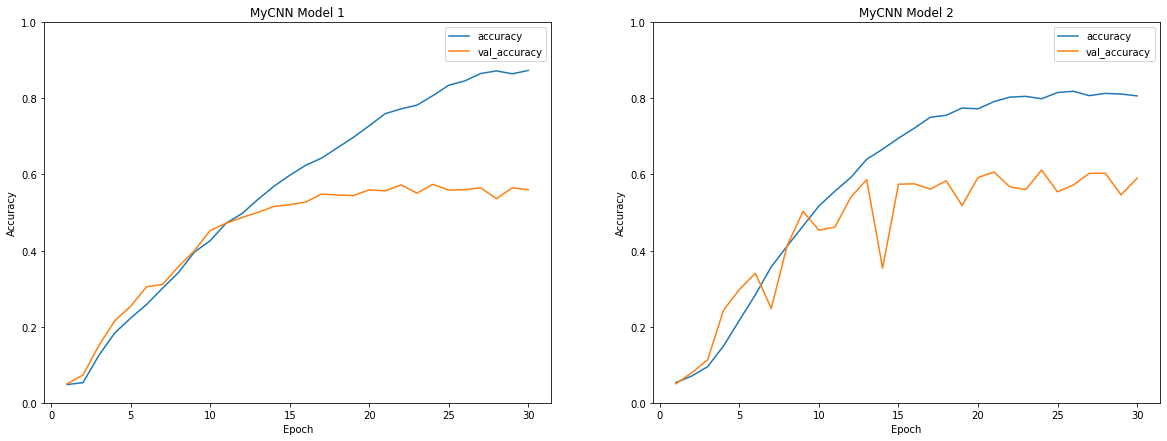

In [ ]:
plot_accuracy(MyCNN_history_1, MyCNN_history_2, ['MyCNN Model 1', 'MyCNN Model 2'])

Επιλέγουμε το πρώτο μοντέλο MyCNN, καθώς φαίνεται να έχει μικρότερη κυμάτωση και καλύτερο accuracy.

####2. Κοινό διάγραμμα

Στο παρακάτω διάγραμμα απεικονίζονται η ακρίβεια εκπαίδευσης και η ακρίβεια επικύρωσης για τα 4 μοντέλα που επιλέξαμε.

In [ ]:
def plot_all(model_histories, labels = None):

  plt.figure(figsize = (20, 10))
  color_arr = ['r','g','b','y']
  plt.ylim(0, 1)
  for i in range(len(model_histories)):
    accuracy = model_histories[i].history['accuracy']
    val_accuracy = model_histories[i].history['val_accuracy']

    plt.plot(accuracy, color=color_arr[i], label=labels[i]+' accuracy')
    plt.plot(val_accuracy, linestyle='dashed', color=color_arr[i], label=labels[i]+' val_accuracy')

    plt.xlabel('Epoch')
    plt.xlabel('Accuracy')

    plt.title('Accuracy and val_accuracy of Neural Networks', fontsize=16)
    plt.legend()

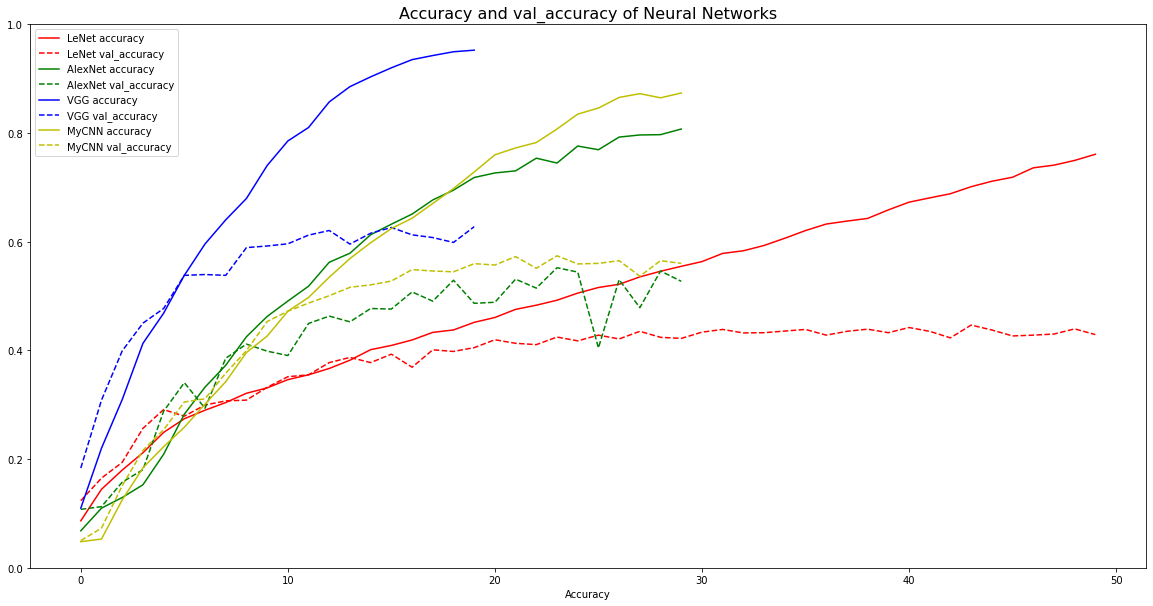

In [ ]:
plot_all([LeNet_history_2, AlexNet_history_2, vgg_history_1, MyCNN_history_1], ['LeNet','AlexNet','VGG','MyCNN'])

####3. Αξιολόγηση Αποτελεσμάτων


- Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου <br><br>
Με την αύξηση των δεδομένων, όπως γνωρίζουμε από τη θεωρία, παίρνουμε καλύτερα αποτελέσματα τόσο για το accuracy όσο και για το val_accuracy. Με άλλα λόγια, το μεγάλο πλήθος εικόνων οδηγεί σε μεγαλύτερη ακρίβεια. Αντίθετα, όταν έχουμε μικρό set με training data, το μοντέλο είναι πιο ευάλωτο σε θόρυβο και ανεπιθύμητες λεπτομέρειες του συνόλου εκπαίδευσης με αποτέλεσμα να μειώνεται σημαντικά η απόδοσή του.<br>
Επιπλέον, με την αύξηση του πλήθους των κλάσεων μειώνεται η ακρίβεια του μοντέλου. Αυτό οφείλεται στο ότι οι εικόνες έχουν πλέον περισσότερες κλάσεις στις οποίες είναι πιθανό να ταξινομηθούν και ενδεχομένως περισσότερες από τις κλάσεις αυτές να έχουν κοινά χαρακτηριστικά όσο αυξάνεται το πλήθος τους. Τέλος, σημειώνουμε πως με την προσθήκη περισσότερων κλάσεων, θα απαιτούνται περισσότερες λεπτομέρειες (επομένως και περισσότερα δείγματα στο training set) προκειμένου να έχουμε αποδεκτή ακρίβεια.<br><br>

- Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer) <br><br>
Περιραματιστήκαμε με τους optimizers adam, Nadam και RMSprop. Σε γενικές γραμμές, ο optimizer adam δίνει καλύτερα αποτελέσματα σε σχέση με τους άλλους δύο αλγόριθμους βελτιστοποίησης. Πιο συγκεκριμένα, δίνει 5-10% καλύτερη ακρίβεια και χρειάζεται λιγότερο αριθμό εποχών για να φτάσει τα αποτελέσματα αυτά. Επιπρόσθετα, η ευθεία ορθότητας επικύρωσης (val_accuracy) με τη χρήση του optimizer adam παρουσιάζει πιο ομαλές μεταβολές και δεν έχει μεγάλη κυμάτωση, ενώ με τους Nadam και RMSprop παρουσιάζει μεγάλη κυμάτωση. Αξίζει να σημειωθεί, πως η ακρίβεια εκπαίδευσης (accuracy) με τη χρήση των τριών optimizer είναι εξίσου ομαλή, χωρίς δηλαδή ιδιαίτερες διακυμάνσεις. Τέλος, παρατηρούμε πως η καμπύλη ακρίβειας με την χρήση του optimizer adam έχει λογαριθμική μορφή.<br><br>

- Επίδραση του μεγέθους δέσμης (batch size) <br><br>
Το μέγεθος δέσμης (batch size) ορίζεται ως το πλήθος των δειγμάτων εκπαίδευσης σε ένα πέρασμα εμπρός/πίσω. Γενικά, για μεγαλύτερο batch size χρειαζόμαστε λιγότερες επαναλήψεις ανά εποχή για να διατρέξουμε όλα τα δείγματα του training set μας. Αυτό έχει ως αποτέλεσμα, να επιτυγχάνεται μεγαλύτερη ταχύτητα στην εκπαίδευση του νευρωνικού. Από την άλλη πλευρά, με μικρότερο batch size απαιτείται περισσότερη ώρα εκτέλεσης με μεγαλύτερη όμως ακρίβεια και πιο γρήγορη σύγκλιση σε μεγάλες τιμές ακρίβειας.<br><br>


##Βήμα 3: Αξιολόγηση ορθότητας


Επιλέγουμε τα 4 από τα παραπάνω μοντέλα που κρίναμε ως καλύτερα από τις γραφικές παραστάσεις.

####Αξιολόγηση LeNet

In [ ]:
LeNet_2 = tf.keras.models.load_model('LeNet_model_2.h5')      # Load model

loss, acc = LeNet_2.evaluate(x_test, y_test, verbose=2)
print('LeNet model, accuracy: {:5.2f}%'.format(100 * acc))

63/63 - 1s - loss: 2.2609 - accuracy: 0.4290 - 590ms/epoch - 9ms/step
LeNet model, accuracy: 42.90%


####Αξιολόγηση AlexNet

In [ ]:
AlexNet_2 = tf.keras.models.load_model('AlexNet_model_2.h5')

loss, acc = AlexNet_2.evaluate(x_test, y_test, verbose=2)
print('AlexNet model, accuracy: {:5.2f}%'.format(100 * acc))

63/63 - 1s - loss: 3.1035 - accuracy: 0.5270 - 1s/epoch - 17ms/step
AlexNet model, accuracy: 52.70%


####Αξιολόγηση VGG

In [ ]:
VGG_1 = tf.keras.models.load_model('vgg_model_1.h5')

loss, acc = VGG_1.evaluate(x_test, y_test, verbose=2)
print('VGG model, accuracy: {:5.2f}%'.format(100 * acc))

63/63 - 1s - loss: 2.0593 - accuracy: 0.6275 - 947ms/epoch - 15ms/step
VGG model, accuracy: 62.75%


####Αξιολόγηση MyCNN

In [ ]:
MyCNN_1 = tf.keras.models.load_model('MyCNN_model_1.h5')

loss, acc = MyCNN_1.evaluate(x_test, y_test, verbose=2)
print('MyCNN model, accuracy: {:5.2f}%'.format(100 * acc))

63/63 - 2s - loss: 2.2362 - accuracy: 0.5600 - 2s/epoch - 33ms/step
MyCNN model, accuracy: 56.00%


Παρατηρούμε πως για όλα τα μοντέλα, οι τιμές του accuracy για τα test data είναι πολύ κοντά στις τιμές του val_accuracy που είχαμε κατά την εκπαίδευση με τα train data. Από την άλλη, το accuracy που είχαμε στα training data είναι πολύ υψηλότερο, το οποίο είναι λογικό, αφού το κάθε μοντέλο αποκτά μια προκατάληψη για το συγκεκριμένο data set που του δίνουμε για εκπαίδευση. Επιπλέον, παρατηρούμε πως από το μέγεθος loss δεν μπορούμε να βγάλουμε ασφαλή συμπεράσματα για το accuracy και αντιστρόφως. Με άλλα λόγια, το accuracy φαίνεται να είναι ανεξάρτητο από το loss. Αυτές οι τιμές αποτελούν χαρακτηριστικά της εκάστοτε υλοποίησης του μοντέλου και των παραμέτρων batch size και εποχών. Τέλος, σημειώνουμε πως το μοντέλο VGG έχει το καλύτερο accuracy στο test data set, δηλαδή σε εικόνες που δεν έχει ξαναδεί το μοντέλο. Έπειτα ακολουθεί το δικό μας μοντέλο, το MyCNN και μετά με μικρή διαφορά το AlexNet. Τη χειρότερη ακρίβεια την έχει το AlexNet, το οποίο έχει και τα λιγότερα layers και φίλτρα στις συνελίξεις οπότ αναμέναμε το αποτέλεσμα αυτό.


## Ερώτημα 2
---
### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για τον καλύτερο συνδυασμό που λάβατε από το Ερώτημα 1 για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), όπως: 
- Πρόωρος τερματισμός (early stopping [tf.keras.callbacks.EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStoppinghttps://)) 

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)) 

\\
, ώστε το μοντέλο σας να γενικεύει καλύτερα.

---
### Βήμα 2: Αξιολόγηση
Αξιολογήστε της ορθότητας για το validation και το test set σας.

##Βήμα 1: Ελεγχος υπερεκπαίδευσης


Για το μοντέλο MyCNN_k θα δοκιμάσουμε τις παρακάτω τεχνικές για να ελέγχξουμε την υπερεκπαίδευση (overfitting):

####Πρόωρος τερματισμός

Η τεχνική αυτή έχει ως στόχο την ελαχιστοποίηση της τιμής loss, ετσι ώστε το μοντέλο να μπορεί να γενικεύει καλύτερα. Πιο συγκεκριμένα, εκτελώντας την tf.keras.callbacks.EarlyStopping, το όρισμα monitor θα είναι 'loss' και το mode θα είναι 'min'. Στο τέλος κάθε εποχής κατά την εκπαίδευση του μοντέλου θα παρατηρείται αν το loss μειώνεται, σε σχέση με τις προηγούμενες k τιμές, όπου το k είναι η τιμή του ορίσματος patience. Όταν το loss σταματήσει να μειώνεται, τότε η εκπαίδευση του μοντέλου σταματά και αποφεύγεται το ενδεχόμενο του overfitting.



In [ ]:
# EarlyStopping function
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

Καλούμε τη συνάρτηση για το val_loss και επιλέγουμε patience = 4, έτσι ώστε να μην είναι πολύ ευαίσθητο το μοντέλο στην τυχαιότητα του loss, αλλά να λαμβάνεται έγκαιρα υπόψη πότε σταματάει να μειώνεται. (Σημείωση: Θα μπορούσαμε να έχουμε χρησιμοποιήσει και το 'loss' για monitor, όμως από το MYCNN μοντέλο φαίνεται θα έτρεχε για περισσότερες εποχές με τον τρόπο αυτό και η Google θα μας έκανε πάλι ban από τη χρήση GPU xd).

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

In [ ]:
# build MyCNN_model_final similar to MyCNN_model_1

MyCNN_one = MyCNN()
MyCNN_one.build((1, 32, 32, 3))
MyCNN_one.summary()

MyCNN_one.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history_early = MyCNN_one.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_test, y_test), callbacks=callback)

MyCNN_one.save('MyCNN_early.h5')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (1, 30, 30, 128)          3584      
                                                                 
 conv2d_51 (Conv2D)          (1, 30, 30, 256)          819456    
                                                                 
 max_pooling2d_30 (MaxPoolin  (1, 14, 14, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (1, 14, 14, 512)          1180160   
                                                                 
 max_pooling2d_31 (MaxPoolin  (1, 6, 6, 512)           0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (1, 6, 6, 512)          

In [ ]:
MyCNN_temp = tf.keras.models.load_model('MyCNN_early.h5')

loss, acc = MyCNN_temp.evaluate(x_test, y_test, verbose=2)
print('MyCNN model with early stop, accuracy: {:5.2f}%'.format(100 * acc))

63/63 - 2s - loss: 1.6050 - accuracy: 0.5845 - 2s/epoch - 27ms/step
MyCNN model with early stop, accuracy: 58.45%


Με τη χρήση της τεχνικής αυτής, η εκπαίδευση του μοντέλου σταματά στην 18η εποχή. Η ακρίβεια αυξήθηκε κατά 2.45% (από το 56% που ήταν προηγουμένως πήγε στο 58.45%) και επιπλέον γλιτώσαμε 12 εποχές εκπαίδευσης, οι οποίες τελικά δεν επέφεραν καμία βελτίωση. 

####Dropout

Η τεχνική dropout χρησιμοποιείται για την αντιμετώπιση της υπερεκπαίδευσης. Η κεντρική ιδέα του dropout είναι η απενεργοποίηση τυχαίων νευρώνων του δικτύου κατά την εκπαίδευση του μοντέλου. Πιο συγκεκριμένα, όταν εφαρμόζουμε την τεχνική αυτή σε ένα στρώμα του μοντέλου, κάποιοι νευρώνες επιλέγονται τυχαία και μηδενίζεται η έξοδός τους. Αυτό έχει ως αποτέλεσμα, να αποτρέπεται η ανάπτυξη αλληλεξαρτησίας μεταξύ γειτονικών νευρώνων, χωρίς όμως να περιορίζεται η ισχύς του καθενός ξεχωριστά.<br><br>

Σχεδιάζουμε το MyCNN_model_1 με dropout αυτή τη φορά:

In [ ]:
def MyCNN():
        return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        layers.Dropout(0.05),
        tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        layers.Dropout(0.05),
        tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        layers.Dropout(0.05),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(20)
    ])

In [ ]:
MyCNN_two = MyCNN()
MyCNN_two.build((1, 32, 32, 3))
MyCNN_two.summary()

MyCNN_two.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history_drop = MyCNN_two.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

MyCNN_two.save('MyCNN_drop.h5')

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (1, 30, 30, 128)          3584      
                                                                 
 conv2d_56 (Conv2D)          (1, 30, 30, 256)          819456    
                                                                 
 max_pooling2d_33 (MaxPoolin  (1, 14, 14, 256)         0         
 g2D)                                                            
                                                                 
 dropout_50 (Dropout)        (1, 14, 14, 256)          0         
                                                                 
 conv2d_57 (Conv2D)          (1, 14, 14, 512)          1180160   
                                                                 
 max_pooling2d_34 (MaxPoolin  (1, 6, 6, 512)           0         
 g2D)                                                

In [ ]:
MyCNN_temp = tf.keras.models.load_model('MyCNN_drop.h5')

loss, acc = MyCNN_temp.evaluate(x_test, y_test, verbose=2)
print('MyCNN model with dropout, accuracy: {:5.2f}%'.format(100 * acc))

63/63 - 2s - loss: 1.5385 - accuracy: 0.5690 - 2s/epoch - 38ms/step
MyCNN model with dropout, accuracy: 56.90%


Έχουμε αύξηση της ακρίβειας κατά 0.9%.

####Data Augmentation

Η υπερεκπαίδευση συνήθως συμβαίνει όταν έχουμε λίγα δεδομένα για την εκπαίδευση του μοντέλου μας. Η βασική ιδέα της τεχνικής data augmentation, είναι η παραγωγή επιπλέον δεδομένων εκπαίδευσης με την εφαρμογή τυχαίων μετασχηματισμών στα ήδη υπάρχοντα δεδομένα εκπαίδευσης. Αυτό έχει ως αποτέλεσμα, την έκθεση του μοντέλου σε περισσότερα δεδομένα εκπαίδευσης τη στιγμή που ο αριθμός των κλάσεων παραμένει σταθερός. Συνεπώς, αυξάνεται η ακρίβεια του μοντέλου. 

Στα παρακάτω παραδείγματα χρησιμοποιούμε data augmentation σε συνδυασμό με τις δύο παραπάνω τεχνικές για καλύτερα αποτελέσματα.

* Data Augmentation και Early Stop

In [ ]:
def MyCNN_Improved_1():

  # define a data_augmentation layer that transforms input data
  data_augmentation = tf.keras.Sequential(
    [
      layers.RandomFlip("horizontal", input_shape=(32, 32, 3)),
      layers.RandomRotation(0.1),
      layers.RandomZoom(0.1)
    ]
  )

  return tf.keras.models.Sequential([
    data_augmentation,                            
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(20)
  ])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

MyCNN_three = MyCNN_Improved_1()

MyCNN_three.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_improved_1 = MyCNN_three.fit(x_train, y_train, epochs=50, batch_size=64, callbacks = [callback], validation_data=(x_val, y_val))

MyCNN_three.save('MyCNN_imp1.h5')

Epoch 1/50
133/133 [==============================] - 8s 31ms/step - loss: 2.8563 - accuracy: 0.1054 - val_loss: 2.6648 - val_accuracy: 0.1753
Epoch 2/50
133/133 [==============================] - 3s 25ms/step - loss: 2.5817 - accuracy: 0.1885 - val_loss: 2.4563 - val_accuracy: 0.2187
Epoch 3/50
133/133 [==============================] - 3s 25ms/step - loss: 2.4268 - accuracy: 0.2353 - val_loss: 2.3105 - val_accuracy: 0.3040
Epoch 4/50
133/133 [==============================] - 3s 25ms/step - loss: 2.3190 - accuracy: 0.2739 - val_loss: 2.3135 - val_accuracy: 0.2967
Epoch 5/50
133/133 [==============================] - 3s 25ms/step - loss: 2.2078 - accuracy: 0.3129 - val_loss: 2.1274 - val_accuracy: 0.3393
Epoch 6/50
133/133 [==============================] - 3s 25ms/step - loss: 2.1218 - accuracy: 0.3434 - val_loss: 2.2577 - val_accuracy: 0.3147
Epoch 7/50
133/133 [==============================] - 3s 23ms/step - loss: 2.0320 - accuracy: 0.3706 - val_loss: 1.9755 - val_accuracy: 0.3993

* Data Augmentation, Early Stop και Dropout

In [ ]:
def MyCNN_Improved_2():

  # define a data_augmentation layer that transforms input data
  data_augmentation = tf.keras.Sequential(
    [
      layers.RandomFlip("horizontal", input_shape=(32, 32, 3)),
      layers.RandomRotation(0.1),
      layers.RandomZoom(0.1)
    ]
  )

  return tf.keras.models.Sequential([
    data_augmentation,                            
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    layers.Dropout(0.02),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    layers.Dropout(0.02),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(20)
  ])

MyCNN_four = MyCNN_Improved_2()
MyCNN_four.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 7, 7, 64)         

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

MyCNN_four.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_improved_2 = MyCNN_four.fit(x_train, y_train, epochs=50, batch_size=64, callbacks = [callback], validation_data=(x_val, y_val))

MyCNN_four.save('MyCNN_imp2.h5')

Epoch 1/50
133/133 [==============================] - 4s 20ms/step - loss: 2.8980 - accuracy: 0.0896 - val_loss: 2.7980 - val_accuracy: 0.1160
Epoch 2/50
133/133 [==============================] - 2s 19ms/step - loss: 2.7158 - accuracy: 0.1471 - val_loss: 2.6137 - val_accuracy: 0.1627
Epoch 3/50
133/133 [==============================] - 2s 18ms/step - loss: 2.5343 - accuracy: 0.2012 - val_loss: 2.6001 - val_accuracy: 0.1927
Epoch 4/50
133/133 [==============================] - 2s 18ms/step - loss: 2.4044 - accuracy: 0.2420 - val_loss: 2.3107 - val_accuracy: 0.2873
Epoch 5/50
133/133 [==============================] - 2s 18ms/step - loss: 2.2994 - accuracy: 0.2773 - val_loss: 2.2080 - val_accuracy: 0.3033
Epoch 6/50
133/133 [==============================] - 2s 18ms/step - loss: 2.2267 - accuracy: 0.3048 - val_loss: 2.1035 - val_accuracy: 0.3580
Epoch 7/50
133/133 [==============================] - 3s 20ms/step - loss: 2.1332 - accuracy: 0.3374 - val_loss: 2.2007 - val_accuracy: 0.3240

##Βήμα 2: Αξιολόγηση

Παρακάτω έχουμε τα αποτελέσματα των 2 υλοποιήσεων του MyCNN με τη χρήση των παραπάνω τεχνικών. Αριστερά πλοτάρουμε το διάγραμμα για το MyCNN και χρήση data augmentation και eraly stop, ενώ δεξιά πλοτάρουμε το MyCNN με χρήση data augmentation, early stop και dropout.

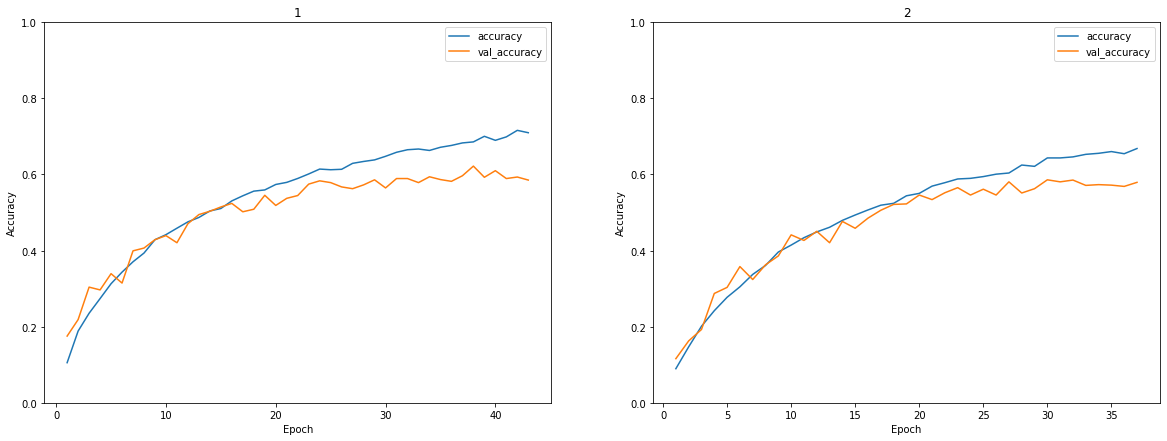

In [ ]:
plot_accuracy(history_improved_1, history_improved_2, ['1','2'])

Η ακρίβεια του original MyCNN είναι 56%

In [ ]:
# Data augmentation and early stop
MyCNN_temp = tf.keras.models.load_model('MyCNN_imp1.h5')

loss, acc = MyCNN_temp.evaluate(x_test, y_test, verbose=2)
print('MyCNN model with data augmentation and early stop, accuracy: {:5.2f}%'.format(100 * acc))

63/63 - 25s - loss: 1.3517 - accuracy: 0.6285 - 25s/epoch - 399ms/step
MyCNN model with data augmentation and early stop, accuracy: 62.85%


Σε σχέση με την αρχική υλοποίηση έχουμε αύξηση της ακρίβειας κατά 6.85%.

In [ ]:
# Data augmentation, early stop and dropout

MyCNN_temp = tf.keras.models.load_model('MyCNN_imp2.h5')

loss, acc = MyCNN_temp.evaluate(x_test, y_test, verbose=2)
print('MyCNN model with data augmentation, early stop and dropout, accuracy: {:5.2f}%'.format(100 * acc))

63/63 - 0s - loss: 1.3861 - accuracy: 0.6035 - 429ms/epoch - 7ms/step
MyCNN model with data augmentation, early stop and dropout, accuracy: 60.35%


Σε σχέση με την αρχική υλοποίηση έχουμε αύξηση της ακρίβειας κατά 4.35%.

Παρατηρούμε αύξηση του accuracy για τα test data, οπότε συμπεραίνουμε πως μειώνεται το overfitting του μοντέλου από τη στιγμή που μπορεί και γενικεύει καλύτερα, δηλαδή κατηγοριοποιεί καλύτερα εικόνες που δεν έχει ξαναδεί. Με πολλές δοκιμές και αλλαγές στις παραμέτρους ενδεχομένως να έχουμε ακόμα μεγαλύτερες τιμές ακρίβειας. Στα δικά μας παραδείγματα η αύξηση της ακρίβειας είναι της τάξης του 5%, το οποίο είναι ικανοποιητικό ποσοστό αν ληφθεί υπόψη πως στην ουσία το μέγεθος του training set μας παρέμεινε το ίδιο. 

## Ερώτημα 3
---
### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς την ορθότητα στην αντιμετώπιση της υπερεκπαίδεσης. 

Για το transfer learning, επιλέξτε το [VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16) για μεταφορά μάθησης.

1. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

2. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

3. Αξιολογήστε τα αποτελέσματά σας, βάσει της ορθότητας του validation set και του test set σας.

####1. VGG16 χωρίς trainable layers

In [128]:
# Instantiate the VGG16 model
pretrained_model = tf.keras.applications.vgg16.VGG16(
                        include_top=False,
                        weights='imagenet',
                        input_tensor=None,
                        input_shape=(32, 32, 3),
                        pooling=None,
                        classes=20,
                        classifier_activation='softmax'
                    )

# freeze
pretrained_model.trainable = False 

In [129]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

Επαληθεύουμε πως έχουμε "παγώσει" τη συνελικτική βάση, αφού το Trainable params είναι 0, όπως φαίνεται στο summary() του μοντέλου μας.

In [130]:
def MyCNN_pre():
  return tf.keras.models.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(20)
  ])

In [131]:
mycnn_pre = MyCNN_pre()
mycnn_pre.summary()

mycnn_pre.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_16 (Flatten)        (None, 512)               0         
                                                                 
 dense_48 (Dense)            (None, 1024)              525312    
                                                                 
 dense_49 (Dense)            (None, 200)               205000    
                                                                 
 dense_50 (Dense)            (None, 20)                4020      
                                                                 
Total params: 15,449,020
Trainable params: 734,332
Non-trainable params: 14,714,688
_________________________________________________________________


In [132]:
# early stop
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history_mycnn_pre = mycnn_pre.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val), callbacks = callback)

mycnn_pre.save('MyCNN_pre.h5')

Epoch 1/20
133/133 [==============================] - 3s 18ms/step - loss: 1.9391 - accuracy: 0.4066 - val_loss: 1.6293 - val_accuracy: 0.4980
Epoch 2/20
133/133 [==============================] - 2s 15ms/step - loss: 1.4636 - accuracy: 0.5380 - val_loss: 1.5131 - val_accuracy: 0.5273
Epoch 3/20
133/133 [==============================] - 2s 15ms/step - loss: 1.2942 - accuracy: 0.5879 - val_loss: 1.5136 - val_accuracy: 0.5293
Epoch 4/20
133/133 [==============================] - 2s 15ms/step - loss: 1.1505 - accuracy: 0.6313 - val_loss: 1.4519 - val_accuracy: 0.5540
Epoch 5/20
133/133 [==============================] - 2s 15ms/step - loss: 1.0417 - accuracy: 0.6667 - val_loss: 1.5054 - val_accuracy: 0.5527
Epoch 6/20
133/133 [==============================] - 2s 15ms/step - loss: 0.9448 - accuracy: 0.6972 - val_loss: 1.4929 - val_accuracy: 0.5613
Epoch 7/20
133/133 [==============================] - 2s 15ms/step - loss: 0.8414 - accuracy: 0.7300 - val_loss: 1.4516 - val_accuracy: 0.5627

In [133]:
MyCNN_temp = tf.keras.models.load_model('MyCNN_pre.h5')

loss, acc = MyCNN_temp.evaluate(x_test, y_test, verbose=2)
print('Pretrained VGG16 model, accuracy: {:5.2f}%'.format(100 * acc))

63/63 - 1s - loss: 1.5336 - accuracy: 0.5860 - 783ms/epoch - 12ms/step
Pretrained VGG16 model, accuracy: 58.60%


Παρατηρούμε πως έχουμε πολύ γρήγορη σύγκλιση του μοντέλου. Δηλαδή με την χρήση της τεχνικές early stop, απαιούνται μόνο 10 εποχές για την εκπαίδευση του μοντέλου. Το αποτέλεσμα αυτό είναι λογικό από τη στιγμή που έχουμε ένα ήδη εκπαιδευμένο μοντέλο.

####2. VGG16 με trainable layers

In [134]:
pretrained_model_2 = tf.keras.applications.vgg16.VGG16(
                        include_top=False,
                        weights='imagenet',
                        input_tensor=None,
                        input_shape=(32, 32, 3),
                        pooling=None,
                        classes=20,
                        classifier_activation='softmax'
                    )

# get number of layers
num_of_layers = len(pretrained_model_2.layers)

# freeze all layers except the last 4
offset = 4
for layer in pretrained_model_2.layers[:(num_of_layers - offset)]:
  layer.trainable = False
pretrained_model_2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

Εδώ βλέπουμε από το summary πως έχουμε και κάποιες trainable παράμετρους.

In [135]:
def MyCNN_pre():
  return tf.keras.models.Sequential([
    pretrained_model_2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(20)
  ])

In [136]:
mycnn_pre = MyCNN_pre()
mycnn_pre.summary()

mycnn_pre.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_17 (Flatten)        (None, 512)               0         
                                                                 
 dense_51 (Dense)            (None, 1024)              525312    
                                                                 
 dense_52 (Dense)            (None, 200)               205000    
                                                                 
 dense_53 (Dense)            (None, 20)                4020      
                                                                 
Total params: 15,449,020
Trainable params: 7,813,756
Non-trainable params: 7,635,264
_________________________________________________________________


In [137]:
# early stop
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history_mycnn_pre2 = mycnn_pre.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val), callbacks = callback)

mycnn_pre.save('MyCNN_pre2.h5')

Epoch 1/20
133/133 [==============================] - 4s 24ms/step - loss: 2.0351 - accuracy: 0.3580 - val_loss: 1.4931 - val_accuracy: 0.5333
Epoch 2/20
133/133 [==============================] - 3s 22ms/step - loss: 1.3157 - accuracy: 0.5985 - val_loss: 1.4469 - val_accuracy: 0.5767
Epoch 3/20
133/133 [==============================] - 3s 23ms/step - loss: 1.0443 - accuracy: 0.6773 - val_loss: 1.2788 - val_accuracy: 0.6133
Epoch 4/20
133/133 [==============================] - 3s 22ms/step - loss: 0.8401 - accuracy: 0.7408 - val_loss: 1.3330 - val_accuracy: 0.6227
Epoch 5/20
133/133 [==============================] - 3s 22ms/step - loss: 0.7243 - accuracy: 0.7695 - val_loss: 1.3238 - val_accuracy: 0.6313
Epoch 6/20
133/133 [==============================] - 3s 22ms/step - loss: 0.6197 - accuracy: 0.8101 - val_loss: 1.3321 - val_accuracy: 0.6500


In [138]:
MyCNN_temp = tf.keras.models.load_model('MyCNN_pre2.h5')

loss, acc = MyCNN_temp.evaluate(x_test, y_test, verbose=2)
print('Pretrained VGG16 model with 4 trainable layers, accuracy: {:5.2f}%'.format(100 * acc))

63/63 - 1s - loss: 1.2825 - accuracy: 0.6615 - 745ms/epoch - 12ms/step
Pretrained VGG16 model with 4 trainable layers, accuracy: 66.15%


Εδώ, στη περίπτωση του VGG16 με trainable layers έχουμε ακόμα πιο γρήγορη σύγκλιση με μόνο 6 εποχές να απαιτούνται για την εκπαίδευση (με χρήση early stopping). Επιπλέον, έχουμε ακόμα μεγαλύτερη ακρίβεια του μοντέλου, το οποίο είναι λογικό από τη στιγμή που αφήνουμε κάποια layers να γίνουν train.

####3. Αξιολόγηση

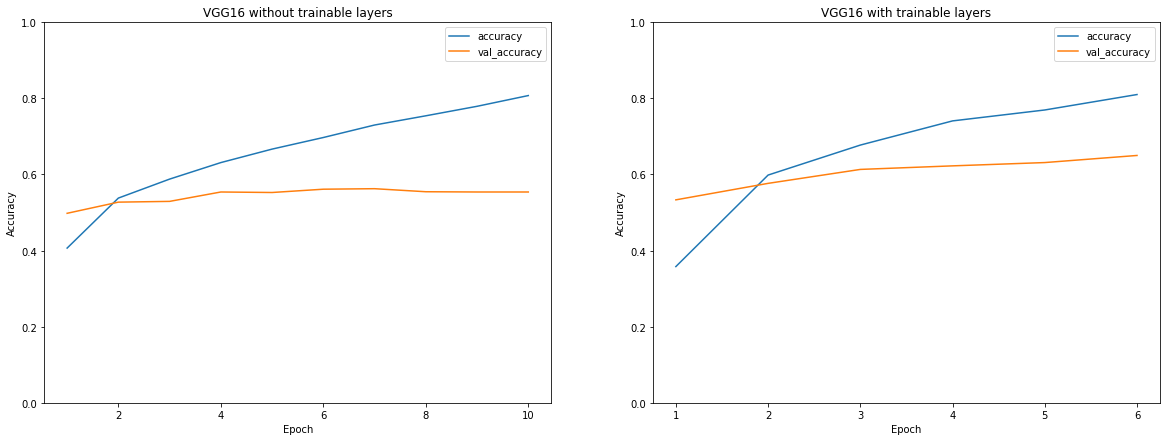

In [141]:
plot_accuracy(history_mycnn_pre, history_mycnn_pre2, ['VGG16 without trainable layers', 'VGG16 with trainable layers'])

In [144]:
# VGG16 model without trainable layers - Left diagram
MyCNN_temp = tf.keras.models.load_model('MyCNN_pre.h5')

loss, acc = MyCNN_temp.evaluate(x_test, y_test, verbose=2)
print('Pretrained VGG16 model without trainable layers, test set accuracy: {:5.2f}%'.format(100 * acc))
print('\n')
loss, acc = MyCNN_temp.evaluate(x_val, y_val, verbose=2)
print('Pretrained VGG16 model without trainable layers, val set accuracy: {:5.2f}%'.format(100 * acc))

63/63 - 1s - loss: 1.5336 - accuracy: 0.5860 - 997ms/epoch - 16ms/step
Pretrained VGG16 model without trainable layers, test set accuracy: 58.60%


47/47 - 1s - loss: 1.6315 - accuracy: 0.5540 - 507ms/epoch - 11ms/step
Pretrained VGG16 model without trainable layers, val set accuracy: 55.40%


In [145]:
# VGG16 model with trainable layers - Right diagram
MyCNN_temp = tf.keras.models.load_model('MyCNN_pre2.h5')

loss, acc = MyCNN_temp.evaluate(x_test, y_test, verbose=2)
print('Pretrained VGG16 model with trainable layers, test set accuracy: {:5.2f}%'.format(100 * acc))
print('\n')
loss, acc = MyCNN_temp.evaluate(x_val, y_val, verbose=2)
print('Pretrained VGG16 model with trainable layers, val set accuracy: {:5.2f}%'.format(100 * acc))

63/63 - 1s - loss: 1.2825 - accuracy: 0.6615 - 958ms/epoch - 15ms/step
Pretrained VGG16 model with trainable layers, test set accuracy: 66.15%


47/47 - 0s - loss: 1.3321 - accuracy: 0.6500 - 415ms/epoch - 9ms/step
Pretrained VGG16 model with trainable layers, val set accuracy: 65.00%


Συμπεραίνουμε πως το pretrained model έχει γενικά καλές τιμές accuracy τόσο στα training όσο και στα validation data. Βέβαια η ακρίβεια αυξάνεται σημαντικά όταν αφήνουμε κάποια από τα layers να είναι trainable. Αυτό σε συνδιασμό με το early stopping για τη μείωση της υπερεκπαίδευσης μας δίνει ακρίβεια 65-66%, το οποίο είναι καλύτερο από όλες τις προηγούμενες μεθόδους που δοκιμάσαμε. Τέλος, αξίζει να σημειωθεί πως η εκπαίδευση του pretrained model γενικά χρειάστηκε πολύ λίγες εποχές. Οπότε, έχουμε τελικά ένα μοντέλο που εκπαιδέυεται με μικρό αριθμό εποχών και έχει πολύ καλή ακρίβεια.  

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).
